In [29]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [97]:
dashboard = {
        "Categoria": "",
        "Tema": [],
        "Datos": [],
        "Datos_con_informacion": [],
        "Datos_sin_informacion": [],
        "Source_information": ""
    }
df_data_all = pd.read_csv("./KPIs.csv")

In [98]:
# Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]
    # Le doy formato a los campos que tienen Si para que sean Sí
df_data.loc[df_data['¿Se tiene?'] == 'Si' , '¿Se tiene?'] = 'Sí'
df_data.loc[df_data['Campo agregado'] == 'Si' , 'Campo agregado'] = 'Sí'


# FILTRACIÓN POR LA COLUMNA CATEGORIA

In [99]:
#Obtengo todas las categorias que existen
categories = df_data['CATEGORIA'].unique()
categories

array(['Cap 1000', 'Energía eléctrica', 'Suministro de Agua',
       'Servicios Profesionales', 'Viáticos', 'Orden social', 'Inmuebles',
       'Papeleria', 'Alimentos', 'TI'], dtype=object)

In [100]:
#Trabajo unicamente con la categoria de la posicion 3
category = categories[1]
arr_datos, arr_without_data, arr_with_data = 0,0,0

In [101]:
#GET CATEGORIA
dashboard['Categoria'] = category

## TEMA

In [102]:
def filter_column(data, column_of_value, value, column_filter):
    """
    Se va a filtar todos los datos con respecto al valor de una columna proporcionada, 
    pero únicamente se va a mostrar los valores de la columna filtrada.
    ES NECESARIO QUE EN DATA SEA TODA LA TABLA DE LOS DATOS.
    COLUMN_OF_VALUE es únicamente el nombre la columna.
    COLUMN_FILTER es únicamente el nombre la columna.
    """
    arr_tema = data[ data[column_of_value] == value][column_filter].unique()
    return arr_tema


In [103]:
theme = filter_column(df_data,'CATEGORIA', category, 'TEMA')
dashboard['Tema'] = theme

# Datos

In [105]:
def every_data(data, name_column_category , category, name_column_tema, tema, name_column_values):
    """
    Se va a obtener el total de datos, cuántos datos se tiene y cuantos no, esto mediante un filtrado de todos los datos (data) 
    mediante las columnas de la categoria y del tema en donde se indicará cuál es la categoria y el tema para hacer el filtrado. 
    Una vez hecho esa filtración sólo se va a obtener la columna indicada en 'name_column_values' para determinar el tamaño de los datos
    y de estos datos cuántos tienen Sí y cuántos No.
    """
    data_of_values = []
    arr_values = data[name_column_values].loc[( data[name_column_category] == category ) & (data[name_column_tema] == tema )].dropna().unique()
    data_total = data[name_column_values].loc[(data[name_column_category] == category) & (data[name_column_tema] == tema)].size
    for i in range(arr_values.size):
        data_of_values.append(data[name_column_values].loc[(data[name_column_category] == category) & 
                                                                                  (data[name_column_tema] == tema) & 
                                                                                  (data[name_column_values] == arr_values[i]) ].count())
    return data_total, arr_values, data_of_values

In [106]:
# j <in range(theme.size) theme.size = 3

every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[0], '¿Se tiene?' )[1]

array(['Sí'], dtype=object)

In [107]:
def get_i(word, array):
    """
    Con base a un arreglo se buscará una paralabra y retornará la iteral de esa ubicación.
    """
    for i in range(array.size):
        if(word == array[i]):
            return i
    return -1

In [118]:
arr_total_datos = []
arr_sin_datos = []
arr_con_datos = []
for j in range(theme.size):
        all_data = every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )

        arr_total_datos.append(all_data[0])

        i = get_i('Sí', all_data[1])

        # Operación ternaria donde si nos devuelve un True es porque no existe esa palabra por ende el valor es 0, 
        # en caso de que devuelva la iteral esa la usamos para el array de every_data

        value = 0 if i == -1 else all_data[2][i]
        arr_con_datos.append(value)

        i = get_i('No', all_data[1])
        value = 0 if i == -1 else all_data[2][i]
        arr_sin_datos.append(value)

In [119]:
dashboard['Datos'] = arr_total_datos
dashboard['Datos_con_informacion'] = arr_con_datos
dashboard['Datos_sin_informacion'] = arr_sin_datos
print(f"""
{arr_total_datos}
{arr_con_datos}
{arr_sin_datos}
""")


[7, 2, 2]
[7, 2, 2]
[0, 0, 0]



# FUENTE DE INFORMACIÓN

In [110]:
def source_information(category):
    """
    Esta función es para obtener la fuente de información de todos los temas que tiene la categoria.
    """
    source_information = df_data['ORIGEN'].loc[(df_data['CATEGORIA'] == category)].unique()
    return source_information

In [111]:
dashboard['Source_information'] = filter_column(df_data,'CATEGORIA', category, 'ORIGEN')

In [112]:
print(dashboard)

{'Categoria': 'Energía eléctrica', 'Tema': array(['Watss consumidos', 'Insumos eléctricos',
       'Mantenimiento de aires acondicionado'], dtype=object), 'Datos': [7, 2, 2], 'Datos_con_informacion': [7, 2, 2], 'Datos_sin_informacion': [0, 0, 0], 'Source_information': array(['Facturas', 'Inventario'], dtype=object)}


# Generando las imagenes

In [113]:
def percentage(dashboard):
    """
    Función que regresa dos arrays, el porcentaje de los datos con información y sin información de un tema.
    """
    arr_percentage_without_information = []
    arr_percentage_with_information = []
    for i in range(len(dashboard['Datos'])):
        porcentaje_con_informacion = ((dashboard['Datos_con_informacion'][i]*100)/dashboard['Datos'][i])/100
        porcentaje_sin_informacion = (1-porcentaje_con_informacion)
        #print(porcentaje_con_informacion, porcentaje_sin_informacion) 
        arr_percentage_without_information.append(porcentaje_sin_informacion)
        arr_percentage_with_information.append(porcentaje_con_informacion)
    return arr_percentage_with_information, arr_percentage_without_information


In [114]:
def rotate_figure(i, arr):
    sum = 0
    if i<0:
        return sum    
    for j in range(len(arr)):
        if(i <= j):
            sum = sum + arr[j]*10
            return sum
        else:
            sum = sum + arr[j]*10
    return False

In [115]:
# make figure and assign axis objects
def bar_pie(dashboard):
    title = dashboard['Categoria']
    etiquetas = dashboard['Tema']
    valores = dashboard['Datos']
        # make figure and assign axis objects
    overall_ratios = valores
    labels = etiquetas
    explode = np.zeros(len(overall_ratios))

    for i in range(len(labels)):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.subplots_adjust(wspace=.1)

        # pie chart parameters
        explode[i] = .1
        # rotate so that first wedge is split by the x-axis
        angle = - (3.6*rotate_figure(i-1,overall_ratios)/2) -(3.6*rotate_figure(i,overall_ratios) )/2 
        wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                            labels=labels, explode=explode)
        color_rebanada = wedges[i].get_facecolor()

        # bar chart parameters
        age_ratios = [percentage(dashboard)[0][i], percentage(dashboard)[1][i]]
        age_labels = ['Con información', 'Sin información']
        bottom = 1
        width = .1

        # Adding from the top matches the legend.
        for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
            bottom -= height
            bc = ax2.bar(0, height, width, bottom=bottom, color=color_rebanada, label=label,
                        alpha=0.25 + 0.50 * j)
            ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

        source_info = ', '.join(map(str, dashboard['Source_information']))
        ax2.set_title(f"Fuente de información: {source_info}")
        ax2.legend()
        ax2.axis('off')
        ax2.set_xlim(- 2.5 * width, 2.5 * width)

        # use ConnectionPatch to draw lines between the two plots
        theta1, theta2 = wedges[i].theta1, wedges[i].theta2
        center, r = wedges[i].center, wedges[i].r
        bar_height = sum(age_ratios)

        # draw top connecting line
        x = r * np.cos(np.pi / 180 * theta2) + center[0]
        y = r * np.sin(np.pi / 180 * theta2) + center[1]
        con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                            xyB=(x, y), coordsB=ax1.transData)
        con.set_color([0, 0, 0])
        con.set_linewidth(4)
        ax2.add_artist(con)

        # draw bottom connecting line
        x = r * np.cos(np.pi / 180 * theta1) + center[0]
        y = r * np.sin(np.pi / 180 * theta1) + center[1]
        con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                            xyB=(x, y), coordsB=ax1.transData)
        con.set_color([0, 0, 0])
        ax2.add_artist(con)
        con.set_linewidth(4)


        plt.savefig(f'./images/Pastel-barras-{title}_{labels[i]}.png')


Creando las imagenes
Se termino de crear las imagenes de Energía eléctrica


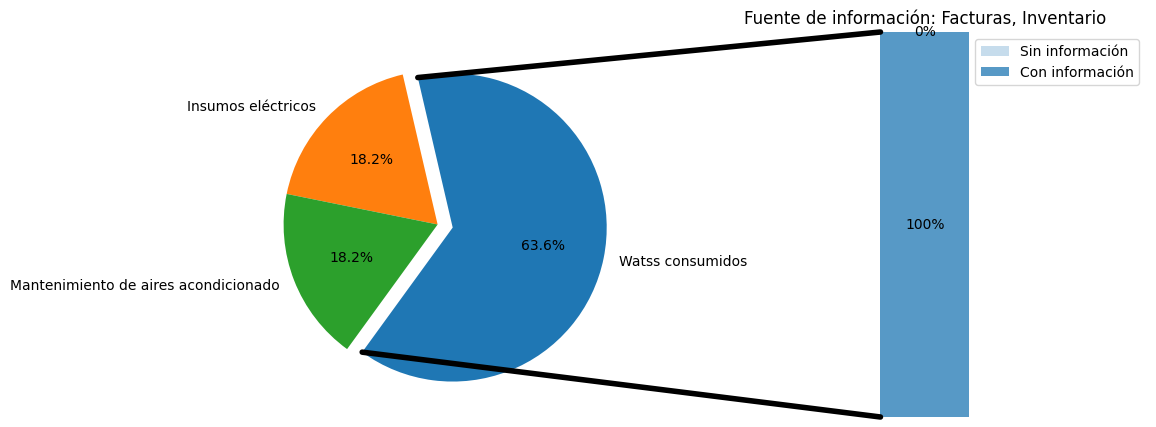

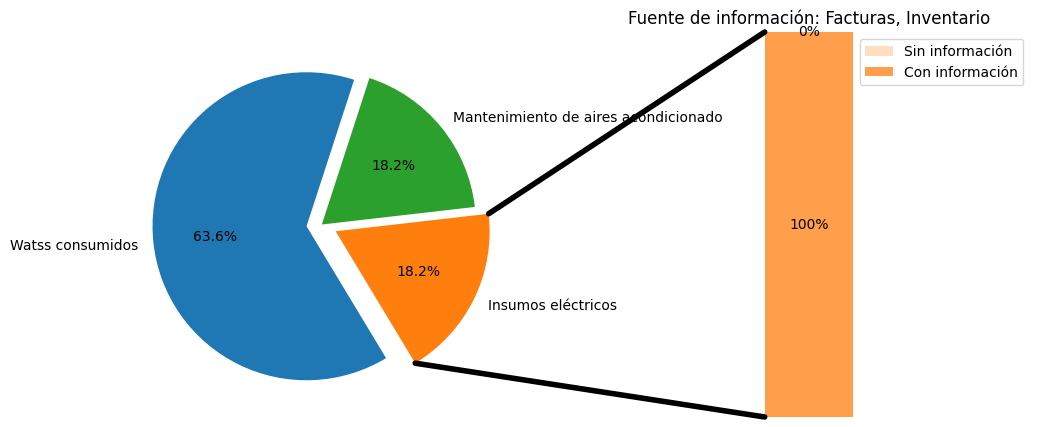

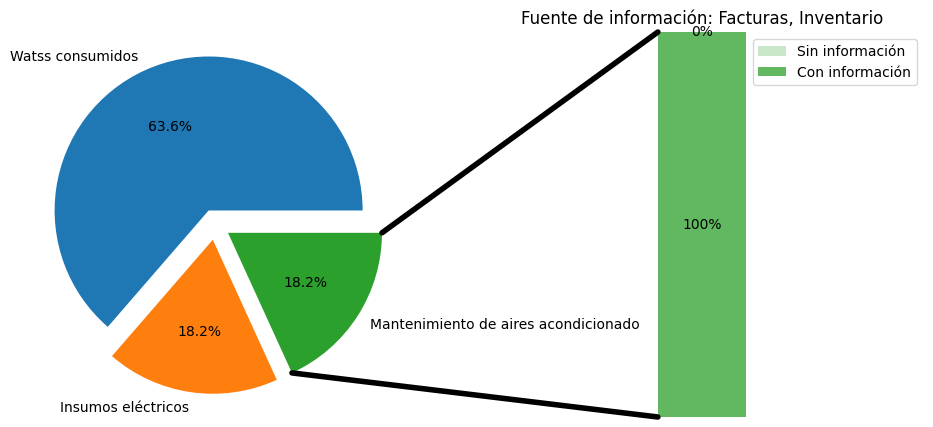

In [116]:
print("Creando las imagenes")
bar_pie(dashboard)
print(f"Se termino de crear las imagenes de {dashboard['Categoria']}")